In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
import nltk
import string
import re

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path= '/content/drive/MyDrive/Colab Notebooks/Player_Sentiment_tweets.csv'
Twitter_Sentiment = pd.read_csv(path)

In [8]:
Twitter_Sentiment

,Unnamed: 0,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,71,2018-07-11T22:44:48.424000,1017177916965351424,@HarryMaguire93 @England You were a monster an...,en,POSITIVE,"{""Neutral"":0.01155695505440235137939453125,""Ne..."
1,72,2018-08-27T18:48:24.653000,1034150655458459653,@ManUtd @ChrisSmalling I swear the admin tries...,en,NEGATIVE,"{""Neutral"":0.2536098957061767578125,""Negative""..."
2,87,2018-06-28T22:39:20,1012465500385894400,@OfficerH1 @gurkanfarukk @Server1243 @timjbhar...,en,NEUTRAL,"{""Neutral"":0.4406521618366241455078125,""Negati..."
3,92,2018-07-07T17:27:47.800000,1015648585524940800,Led his club team to a champions league final ...,en,NEUTRAL,"{""Neutral"":0.716057717800140380859375,""Negativ..."
4,139,2018-08-29T22:48:05.720000,1034935748234014720,@paulpogba The majority of people realise that...,en,NEGATIVE,"{""Neutral"":0.238354742527008056640625,""Negativ..."
...,...,...,...,...,...,...,...
107331,1931296,2018-07-16T15:00:51.746000,1018873101625503746,@Ibra_official @paulpogba If the game speaks.....,en,NEGATIVE,"{""Neutral"":0.138342320919036865234375,""Negativ..."
107332,1931305,2018-06-27T15:57:48.080000,1012002061679022080,Germany getting what they deserve for not brin...,en,NEGATIVE,"{""Neutral"":0.339511811733245849609375,""Negativ..."
107333,1931309,2018-05-19T15:30:22,997862032279003136,@ValerioCiccone @MedhiBenatia you have won the...,en,POSITIVE,"{""Neutral"":0.4022696316242218017578125,""Negati..."
107334,1931311,2018-08-09T11:22:00.368000,1027515333735866368,@VegardLaukeland @Gooner9494 @LP10oficial @lta...,en,POSITIVE,"{""Neutral"":0.18496811389923095703125,""Negative..."


**About The Dataset**  
1."tweet_date_created" - The time and date when the tweet was created  
2."tweet_id" - The id of the tweet by the player  
3."tweet_text" - The tweet by the player  
4."Language" -    language of the tweet    
5."sentiment" - Whether the sentiment is "neutral", "positive", or 
  "negative". 

In [9]:
#Gain information About Dataset
Twitter_Sentiment.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107336 entries, 0 to 107335
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          107336 non-null  int64 
 1   tweet_date_created  107336 non-null  object
 2   tweet_id            107336 non-null  int64 
 3   tweet_text          107336 non-null  object
 4   language            107336 non-null  object
 5   sentiment           107336 non-null  object
 6   sentiment_score     107336 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.7+ MB


### Handling Missing Values

In [10]:
Twitter_Sentiment.isnull().sum()

Unnamed: 0            0
tweet_date_created    0
tweet_id              0
tweet_text            0
language              0
sentiment             0
sentiment_score       0
dtype: int64

In [11]:
Twitter_Sentiment.duplicated().sum()

0

In [12]:
Twitter_Sentiment['sentiment'].value_counts()

NEGATIVE    31858
NEUTRAL     31490
POSITIVE    31342
MIXED       12646
Name: sentiment, dtype: int64

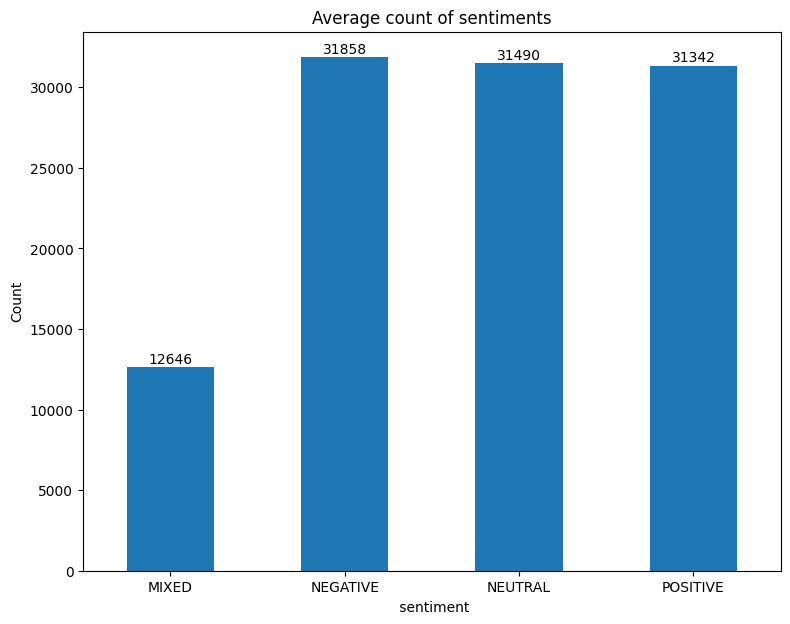

In [13]:

#Plot the Average Count of Sentiment
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(9,7))
plot = Twitter_Sentiment.groupby('sentiment')['sentiment'].count().plot(kind = 'bar')
plt.xlabel(' sentiment')
plt.ylabel('Count')
plt.title('Average count of sentiments')
plt.xticks(rotation=0)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

### Drop Named Mixed Rows because confusing the sentiment 

In [14]:
Twitter_Sentiment.drop(Twitter_Sentiment[Twitter_Sentiment['sentiment']=='MIXED'].index,inplace=True)

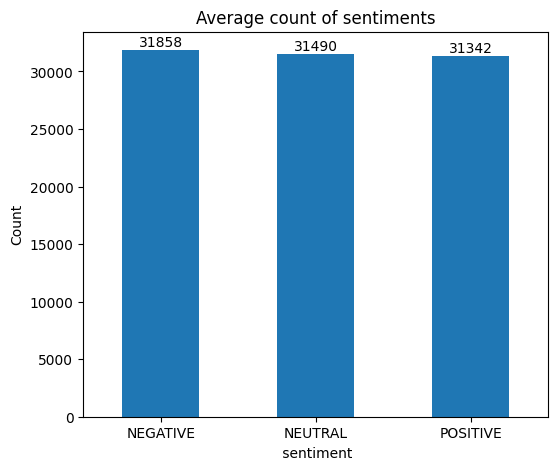

In [15]:
#again plot the diagram for check the previous action
fig, ax = plt.subplots(figsize =(6,5))
plot = Twitter_Sentiment.groupby('sentiment')['sentiment'].count().plot(kind = 'bar')
plt.xlabel(' sentiment')
plt.ylabel('Count')
plt.title('Average count of sentiments')
plt.xticks(rotation=0)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

In [16]:
tweet_Sentiment_data = Twitter_Sentiment[['tweet_text','sentiment']]

In [17]:

nltk.download('wordnet')
nltk.download('stopwords')
#remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: remove_emoji(x))

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: contraction_expansion(x))

#remove url,user_mention,hashtags
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: re.sub(r'http\S+', '', x))  # remove URLs
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: re.sub(r'@\w+', '', x))  # remove user mentions
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: re.sub(r'#\w+', '', x))  # remove hashtags

# remove punctuation and convert to lowercase
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # remove punctuation
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].str.lower()  # convert to lowercase

# tokenize text using NLTK TweetTokenizer
tokenizer = TweetTokenizer()
tweet_Sentiment_data['tokens'] = tweet_Sentiment_data['tweet_text'].apply(tokenizer.tokenize)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-17-e93040b9f873>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: remove_emoji(x))
<ipython-input-17-e93040b9f873>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tweet_text'

In [18]:
#Customize stopword as per data
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'just', 'am', "you'll", 'doing', 'nor', 'when', 'himself', "couldn't", 'his', 'again', 'mustn', 'should', 'haven', "you'd", 'i', "wouldn't", 'own', 'most', 'y', 'whom', 'further', 't', 'of', 'from', 'those', 'now', 'our', 'up', 'wouldn', 'you', 'down', 'could', 'it', 'once', 'by', 'that', 'm', 'below', "mustn't", "you've", 'were', 'very', 'she', 'because', "didn't", 'wasn', 'been', 'yourself', 'herself', 'are', 's', "you're", 'while', "haven't", 'only', 'does', "hadn't", 'between', 'ain', 'all', 'shan', 'why', 'he', 'how', "needn't", 'as', 'might', 'the', 'such', 'with', 'off', 'ma', 'this', 'theirs', 'didn', 'being', 'in', "mightn't", 'they', "hasn't", 'shall', 'or', 'doesn', 'was', 'would', "it's", 'at', 'to', 'd', 'we', 'their', "doesn't", 've', 'can', 'what', 'than', 'have', 'did', 'through', 'too', 'itself', "should've", "don't", "weren't", 'few', 'but', 'during', 'him', 'has', 'no', 'any', 'same', 'couldn', 'for', 'won', 'other', 'these', 'until', 'be', 'both', 'don', 'hers', 'o

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# remove stop words
stop_words = set(stopwords.words('english'))
tweet_Sentiment_data['tokens'] = tweet_Sentiment_data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# lemmatize tokens using NLTK WordNetLemmatizer
wnl = nltk.WordNetLemmatizer()
tweet_Sentiment_data['tokens'] = tweet_Sentiment_data['tokens'].apply(lambda x: [wnl.lemmatize(word) for word in x])

# join tokens back into text
tweet_Sentiment_data['tweet_text'] = tweet_Sentiment_data['tokens'].apply(lambda x: ' '.join(x))

<ipython-input-20-3ff5948727eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_Sentiment_data['tokens'] = tweet_Sentiment_data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
<ipython-input-20-3ff5948727eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_Sentiment_data['tokens'] = tweet_Sentiment_data['tokens'].apply(lambda x: [wnl.lemmatize(word) for word in x])
<ipython-input-20-3ff5948727eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [21]:
tweet_Sentiment_data

,tweet_text,sentiment,tokens
0,monster whole country proud team mate head beg...,POSITIVE,"[monster, whole, country, proud, team, mate, h..."
1,swear admin try fucking wind u,NEGATIVE,"[swear, admin, try, fucking, wind, u]"
2,make sense yeah fenerbahçe didnt big job 10 ye...,NEUTRAL,"[make, sense, yeah, fenerbahçe, didnt, big, jo..."
3,led club team champion league final leading wo...,NEUTRAL,"[led, club, team, champion, league, final, lea..."
4,majority people realise racism form utterly un...,NEGATIVE,"[majority, people, realise, racism, form, utte..."
...,...,...,...
107331,game speaksit shit game,NEGATIVE,"[game, speaksit, shit, game]"
107332,germany getting deserve bringing squad smfh,NEGATIVE,"[germany, getting, deserve, bringing, squad, s..."
107333,trophy best playstyle serie problem,POSITIVE,"[trophy, best, playstyle, serie, problem]"
107334,excited,POSITIVE,[excited]


In [22]:
tweet_Sentiment_data['sentiment'] = tweet_Sentiment_data['sentiment'].apply(lambda x: str.lower(x))

<ipython-input-22-37c56a21c4f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_Sentiment_data['sentiment'] = tweet_Sentiment_data['sentiment'].apply(lambda x: str.lower(x))


In [23]:
tweet_Sentiment_data

,tweet_text,sentiment,tokens
0,monster whole country proud team mate head beg...,positive,"[monster, whole, country, proud, team, mate, h..."
1,swear admin try fucking wind u,negative,"[swear, admin, try, fucking, wind, u]"
2,make sense yeah fenerbahçe didnt big job 10 ye...,neutral,"[make, sense, yeah, fenerbahçe, didnt, big, jo..."
3,led club team champion league final leading wo...,neutral,"[led, club, team, champion, league, final, lea..."
4,majority people realise racism form utterly un...,negative,"[majority, people, realise, racism, form, utte..."
...,...,...,...
107331,game speaksit shit game,negative,"[game, speaksit, shit, game]"
107332,germany getting deserve bringing squad smfh,negative,"[germany, getting, deserve, bringing, squad, s..."
107333,trophy best playstyle serie problem,positive,"[trophy, best, playstyle, serie, problem]"
107334,excited,positive,[excited]


In [24]:
'''----------------------------Visualization of Important Words from Positive Reviews--------------------'''
positive_tweets = tweet_Sentiment_data[tweet_Sentiment_data["sentiment"] == "positive"]
negative_tweets = tweet_Sentiment_data[tweet_Sentiment_data["sentiment"] == "negative"]
neutral_tweets = tweet_Sentiment_data[tweet_Sentiment_data["sentiment"] == "neutral"]

In [25]:
positive_tweets

,tweet_text,sentiment,tokens
0,monster whole country proud team mate head beg...,positive,"[monster, whole, country, proud, team, mate, h..."
5,thank many year great football true legend alw...,positive,"[thank, many, year, great, football, true, leg..."
6,proud part national team long well done great ...,positive,"[proud, part, national, team, long, well, done..."
9,soo finale france croatia,positive,"[soo, finale, france, croatia]"
10,big man talk next african cup nation please go...,positive,"[big, man, talk, next, african, cup, nation, p..."
...,...,...,...
107323,gutted excellent last season pitch right attit...,positive,"[gutted, excellent, last, season, pitch, right..."
107325,whozz got da best smile,positive,"[whozz, got, da, best, smile]"
107329,going france bc manchester united let ’ go,positive,"[going, france, bc, manchester, united, let, ’..."
107333,trophy best playstyle serie problem,positive,"[trophy, best, playstyle, serie, problem]"


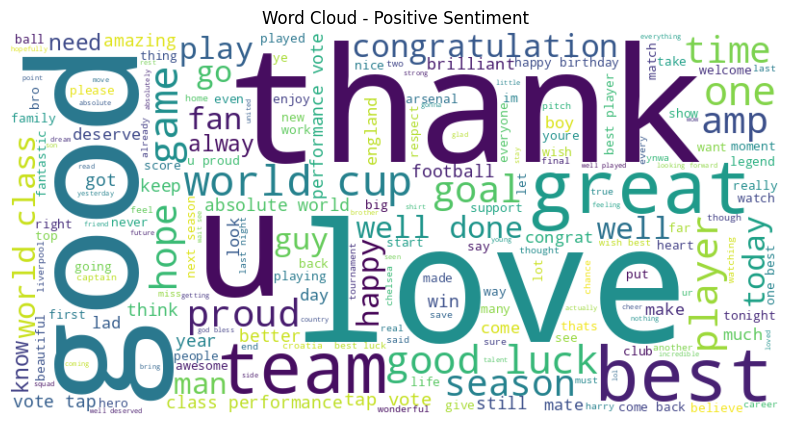

In [26]:
# For example, let's consider all tweets from the positive sentiment category
positive_text = " ".join(positive_tweets["tweet_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()


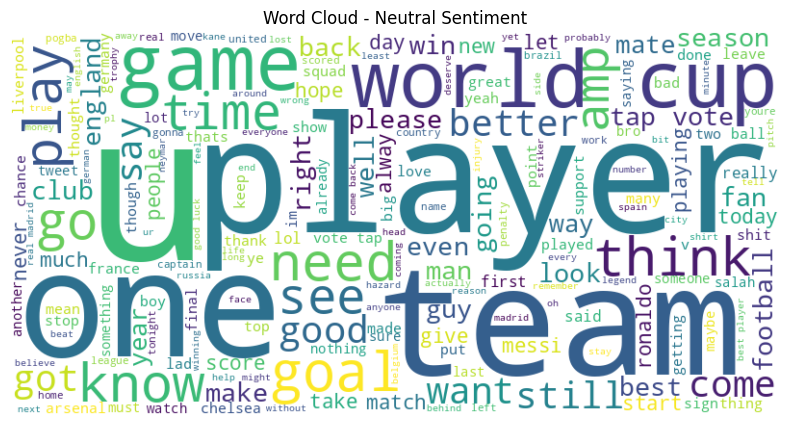

In [27]:
neutral_text = " ".join(neutral_tweets["tweet_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Neutral Sentiment")
plt.show()

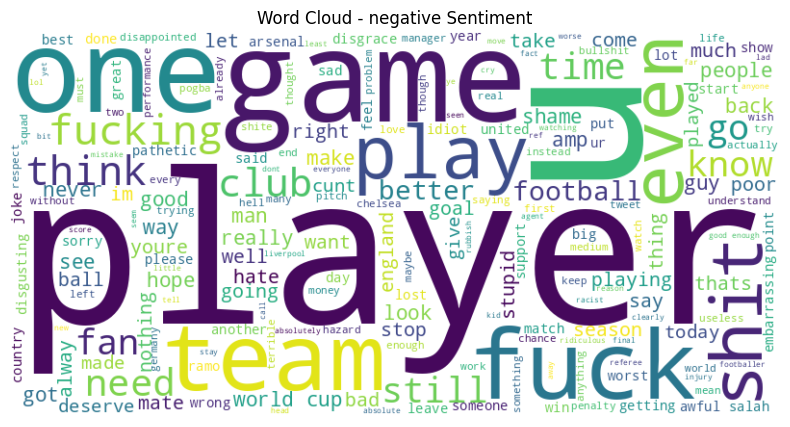

In [28]:
negative_text = " ".join(negative_tweets["tweet_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Word Cloud - negative Sentiment")
plt.show()


In [31]:
#convert preproceed data to csv file
# saving the dataframe
tweet_Sentiment_data.to_csv('players_preprocessed_data.csv')

<ipython-input-32-21370c883b24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_Sentiment_data['word_length'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: len(str(x).split()))


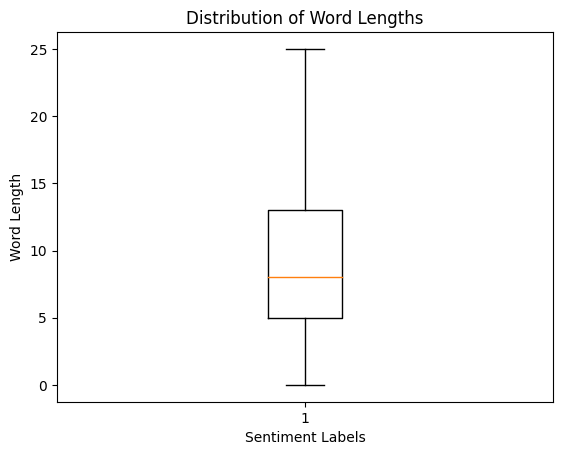

In [32]:
# Word Distribution
tweet_Sentiment_data['word_length'] = tweet_Sentiment_data['tweet_text'].apply(lambda x: len(str(x).split()))
plt.boxplot(tweet_Sentiment_data['word_length'], showfliers=False)
plt.xlabel('Sentiment Labels')
plt.ylabel('Word Length')
plt.title('Distribution of Word Lengths')
plt.show()

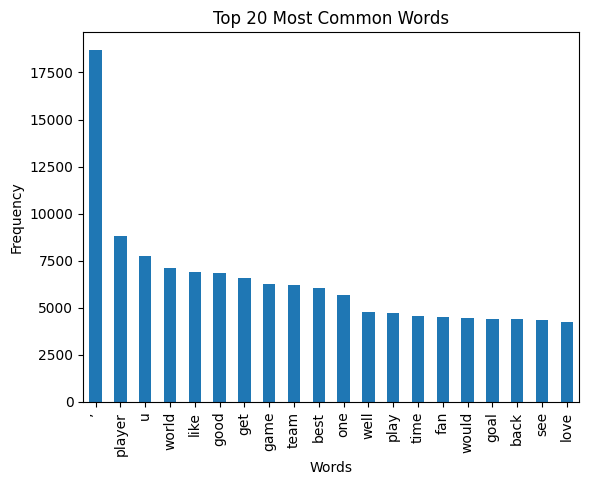

In [34]:
word_freq = tweet_Sentiment_data['tweet_text'].str.split(expand=True).stack().value_counts()
word_freq[:20].plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()